<a href="https://colab.research.google.com/github/mustafahunerli/veri_bilimi_kurs_kodlari_py_edit/blob/main/D2_Veri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Veri Analizi**

##1. Veri Seti Hikayesi ve Yapısının İncelenmesi

###1.1 Veri setinin hikayesi

veri setinin hikayesi nedir? veri nasıl toplandı, veri nasıl oluşturuldu?

In [4]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


ANALİZ: 
* price: dolar cinsinde fiyat ( 326– 18,823) carat: ağırlık (0.2–5.01) cut: kalite (Fair, Good, Very Good, Premium, Ideal) color: renk (from J (worst) to D (best)) clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) x: length in mm (0–10.74) y: width in mm (0–58.9) z: depth in mm (0–31.8) depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79) table: elmasın en geniş noktasına göre genişliği (43–95)

* elmas çeşitlerinin detaylarını içeren tablo

###1.2 Veri seti yapısal bilgileri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


ANALİZ: 
* bir pandas dataframe i, 53940 gözlem var, 10 değişken var, object bir kategorik değişken olarak düşünülmelidir. bunun dışındaki tüm değişkenler kesikli ve sürekli değişkenledir category(3), float64(6), int64(1)

In [6]:
df.dtypes #sadece değişken bilgileri

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [7]:
import pandas as pd # değişkenlerin arasındaki object öğesini categorical değişkene çevirmeliyiz
df.method = pd.Categorical(df.color);
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

##2. Veri Seti Betimsel İstatistikleri

her bir değişkenin;
* dağılım ölçüleri
* eğilim ölçüleri
* frekans dağılımı ölçülmek istenir.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


bu fonksiyon eksik gözlemleri göz ardı eder ve kadegorik değişkenleri hesaplamaz.




## 3. Eksik Değerlerin İncelenmesi (veri ön işleme)

In [9]:
df.isnull().sum() #kolonlarda kaçar tane boş değer var

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df["carat"].fillna(0, inplace = True) #ilgili değişkendeki null değerlere 0 ata ve bunu dataya yaz (inplace)

In [11]:
df["carat"].fillna(df.carat.mean(), inplace = True) #ilgili değişkendeki null değerlere ortalamayı ata ve bunu dataya yaz (inplace)

##4. Kategorik Değişken Özetleri

In [12]:
kat_df = df.select_dtypes(include = ["object","category"]) # sadece kategorik değişkenlerin oldugu kolonları getir
kat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [13]:
kat_df["cut"].value_counts() #method değişkenine göre frekans sayıları

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [14]:
kat_df["cut"].value_counts().count() #method değişkeninin sınıf sayısı

5

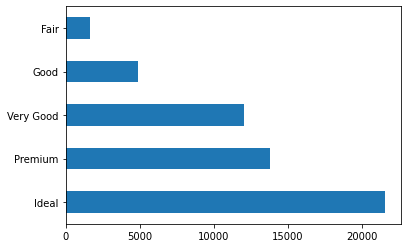

In [15]:
df["cut"].value_counts().plot.barh(); #method değişkeninin frekans sayısı grafiği

##5. Sürekli Değişken Özetleri

In [16]:
df_num = df.select_dtypes(include=["float64","int64"]) #sadece numerik değişken kolonları
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [17]:
df_num["carat"].describe().T #tek bi değişkenin betimsel istatistikleri

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### Betimsel istatistiklerin isimlerinin değiştirilmesi

In [18]:
print("Ortalama: " + str(df_num["carat"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["carat"].count())) 
print("Maksimum Değer: " + str(df_num["carat"].max()))
print("Minimum Değer: " + str(df_num["carat"].min()))
print("Medyan: " + str(df_num["carat"].median()))
print("Standart Sapma: " + str(df_num["carat"].std()))

Ortalama: 0.7979397478679852
Dolu Gözlem Sayısı: 53940
Maksimum Değer: 5.01
Minimum Değer: 0.2
Medyan: 0.7
Standart Sapma: 0.47401124440538067


## 6. Ordinal değişkenlerin tanımlanması (veri ön işleme)
* bazı değişkenlerin ordinal olduğu görünüyor. (cut,clarity). bunların ordinal olduğunun belirtilmesi gerekir.

In [19]:
df.cut.head(1) 

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

categorik değişkenin aralarında bir sıralama olmadığı görülüyor

In [20]:
from pandas.api.types import CategoricalDtype #import edilmeli
cut_categoriler = ["Fair","Good","Very Good","Premium","Ideal"] #istediğimiz sıralamada bir liste oluşturuyoruz
df.cut = df.cut.astype(CategoricalDtype(cut_categoriler,ordered = True))  #ordinal yapının cut değişkenine bizim listemizdeki sırayla işlenmesi 

In [21]:
df.cut.head(1) # tekrar çalışırıyoruz

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

ordinal bir değişken olarak atadık ve sıralama bizim isedigimiz şekilde.

#**Veri Görselleştirme**

##1. Dağılım Grafikleri

###1.1 Kategorik Değişkenlerin Görselleştirilmesi (*Barplot*)
* kategorik değişkenlerin göreslleştirilmesi
* gelnel olarak grafikler için seaborn kütüphanesi kullanılır (yüksek seviye grafikleme) ama bazen de pandas kütüphanesinden grafiklere bakmak isteyebiliriz.

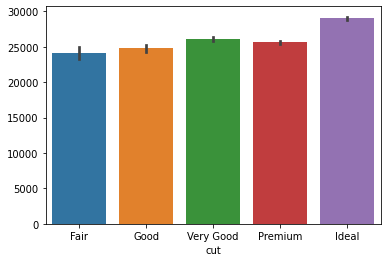

In [22]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

cut değişkeninin sınıflarının frekansları

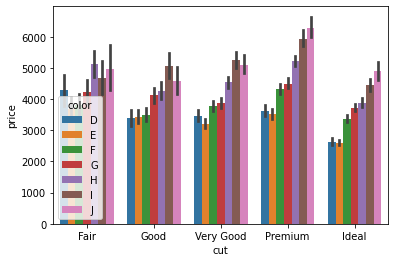

In [23]:
sns.barplot(x = "cut", y = "price", hue="color",data = df); #yeni bir boyut daha ekliyoruz.

* kategorik değişkenin görselleştirmesi
* iki değişkenin aynı grafikte görüntülenmesi. bunun için seaborn dan catplot kullanılır
* price değişkenini etkileyen değişkenlerden biri de color değişkenidir. cut değişkeni ile birlikte değerlendirirldiğinde color değişkeninin price değişkenini nasıl etkilediğini görebiliyoruz. bu gibi çaprazlamalarda catplot da bullanılabilir

###1.2 Sayısal Değişkenlerin Görselleştirilmesi (*Histogram ve Yoğunluk*)

* Displot

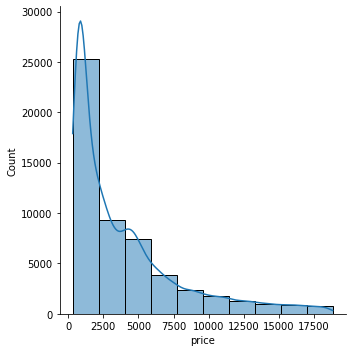

In [29]:
sns.displot(df.price, bins = 10 , kde = True);

dağılım görselleştirmek için kullanılır. kde = oalsılık yoğunluk fonk, bins = çubuk sayısı

analiz: 
* 0 la 2400 arasında, 25000 sayı var,
* 2400 le 3200 arasında yaklaşık 9000 sayı var,
* en çok sayı 0 la 24000 arasında gibi görünüyor
* grafik yayvan gibi st sapması yüksek
* çarpık bir grafik
* medyanı ile ortalaması arasında ciddi fark var
* iki tepeli bir yapı var bu veriyi başka bir değişken etkilemiş.
---------------------------








* Kdeplot

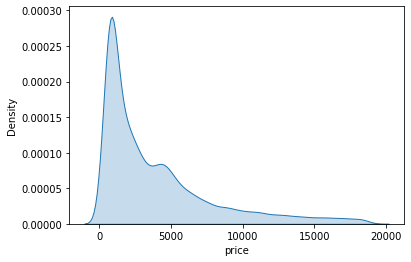

In [31]:
sns.kdeplot(df.price, shade = True); # sadece kde nin

* FaceGrid



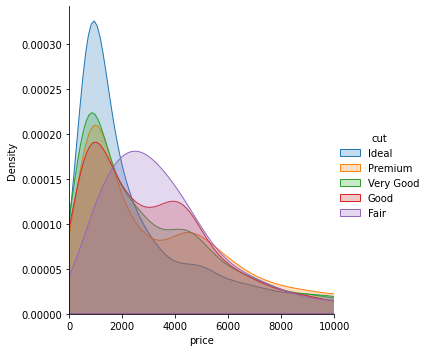

In [35]:
#yeni bir boyut daha ekliyoruz
(sns
 .FacetGrid(df, #veri
              hue = "cut",#yeni boyut
              height = 5, #yükseklik
              xlim = (0, 10000)) #x ekseni 0 la 10000 arasında olsun
 .map(sns.kdeplot, "price", shade= True) #price değikenini mapliyoruz
 .add_legend()
);

price değişkeninin dağılımını etkileyen cut değişkeninin detaylarını görüntülüyoruz.

* normal bir dünyada bir sayısal değişkenin normal dağılmasını bekleriz. yani ortadan şişik ve tek tepeli. burda sola yaslanmış ve iki tepeli bir yapı var.
* cut değişkeninin ideal sınıfının price değişkeninde 0 la 2000 arasında da fazla yer kaplıyor.
* price değişkeninde 6000 den sonra tüm cut değişkenlerinin aynı frekanslarda gözlemleniyor. 
* tüm kalite sınıfların her fiyat aralıklarında çeşitli kümelenmeleri var.
* dağılımın 2 tepeli olmasındaki en büyük etkenin fair cut sınıfı oldugunu görüyoruz.
----------------------

* Catplot (çaprazlama)

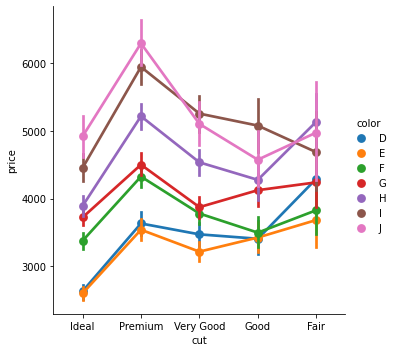

In [45]:
#çaprazlama
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

analiz: 
* cut değişkeninin price değişkeni üzerindeki etkisinin color değişkeni bazında dağılımını görüyoruz.
* ör ideal sınıfının içerisinde birden fazla renk olması ve birbirlerinden uzak olması price değişkenini etkileyen bir bilgi oldugunu gösteriyor.
* ör good sınıfında 3000 ile 4000 arasındaki price larda rengin çok etkili oldugunu görmüyoruz.